# Project 2


Made by:                                                                     
Tsourakis Orfeas(sdi1700175)                                                 
Taratsas Ioannis(sdi1700160)

## Data Instertion

Here we are going to import the libraries that we will use 

In [1]:
import pandas as pd
import numpy as np
import csv
import os,sys
import matplotlib.pyplot as plt

from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from nltk.stem import WordNetLemmatizer

import nltk
import seaborn as sns
from nltk.corpus import stopwords as stwords
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize 

from collections import defaultdict
from pathlib import Path

from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,StratifiedKFold

from sklearn.model_selection import cross_validate

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

from sklearn.preprocessing import label_binarize

from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

from sklearn.metrics.pairwise import cosine_similarity

from numpy import interp

Here we insert the data for each category by opening their texts seperately and we make our df, which contains all the data we need for our complete tsv!

In [2]:
#Tuple with locations in memory,and category
dir_paths = [("C:/Tede/Ergasia2/fulltext/data/business","business"),
               ("C:/Tede/Ergasia2/fulltext/data/entertainment","entertainment"),
               ("C:/Tede/Ergasia2/fulltext/data/politics","politics"),
               ("C:/Tede/Ergasia2/fulltext/data/sport","sport"),
               ("C:/Tede/Ergasia2/fulltext/data/tech","tech")]

results = defaultdict(list)
#for every path
for x,y in dir_paths:
    for file in Path(x).iterdir():  #we open each one 
        with open(file, "r") as file_open:#read file
            text=file_open.read()
            index=text.find('\n') #find first change of line
            content="".join(text[index:].split("\n"))
            title="".join(text[:index].split("\n"))
            results["title"].append(title)
            results["content"].append(content)
            results["category"].append(y)
        
df = pd.DataFrame(results)
# give a unique id in every article
df['id'] = df.index
#do id first column
clist = list(df.columns)
clist_new = clist[-1:]+clist[:-1]
df = df[clist_new]

## 1. Wordclouds

For every wordcloud we find the stopwords, lemmatize the data and finally we make the wordcloud

First Wordcloud: Business

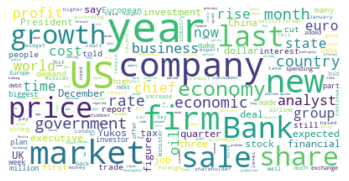

In [3]:
temp_business=df.loc[df['category'] == 'business']

#Create stopwords
stopwords=set(STOPWORDS)
stopwords.update(["Mr","wa","ha","will","may","said","may","set","one","two"])
text=temp_business.content.str.cat(sep=' ')

lemmatizer = WordNetLemmatizer()
word_list = nltk.word_tokenize(text)
# Lemmatize list of words and join
text = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    
wordcloud=WordCloud(max_font_size=50, max_words=200,stopwords=stopwords,collocations=False,background_color="white").generate(text)

#This is how u show a wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Second Wordcloud: Entertainment

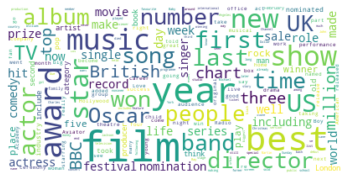

In [4]:
temp_entertainment=df.loc[df['category'] == 'entertainment']

#Create stopwords
stopwords=set(STOPWORDS)
stopwords.update(["wa","said","n't","Mr","will","ha","may","set","one","two"])
text=temp_entertainment.content.str.cat(sep=' ')

lemmatizer = WordNetLemmatizer()
word_list = nltk.word_tokenize(text)
# Lemmatize list of words and join
text = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    
wordcloud=WordCloud(max_font_size=50, max_words=200,stopwords=stopwords,collocations=False,background_color="white").generate(text)

#This is how u show a wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Third Wordcloud: Politics

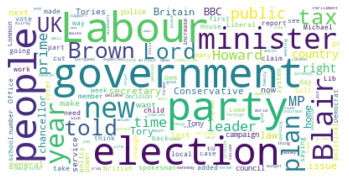

In [5]:
temp_politics=df.loc[df['category'] == 'politics']

#Create stopwords
stopwords=set(STOPWORDS)
stopwords.update(["wa","said","say","n't","Mr","will","ha","may","set","one","two"])
text=temp_politics.content.str.cat(sep=' ')

lemmatizer = WordNetLemmatizer()
word_list = nltk.word_tokenize(text)
# Lemmatize list of words and join
text = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    
wordcloud=WordCloud(max_font_size=50, max_words=200,stopwords=stopwords,collocations=False,background_color="white").generate(text)

#This is how u show a wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Fourth Wordcloud: Sport

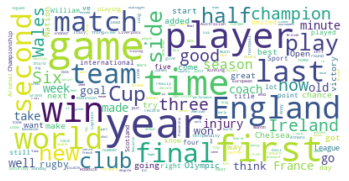

In [13]:
temp_sport=df.loc[df['category'] == 'sport']

#Create stopwords
stopwords=set(STOPWORDS)
stopwords.update(["wa","said","say","n't","Mr","will","ha","told","back","may","set","one","two"])
text=temp_sport.content.str.cat(sep=' ')

lemmatizer = WordNetLemmatizer()
word_list = nltk.word_tokenize(text)
# Lemmatize list of words and join
text = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    
wordcloud=WordCloud(max_font_size=50, max_words=200,stopwords=stopwords,collocations=False,background_color="white").generate(text)

#This is how u show a wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [15]:
text

"British hurdler Sarah Claxton is confident she can win her first major medal at next month 's European Indoor Championships in Madrid.The 25-year-old ha already smashed the British record over 60m hurdle twice this season , setting a new mark of 7.96 second to win the AAAs title . `` I am quite confident , '' said Claxton . `` But I take each race a it come . `` As long a I keep up my training but not do too much I think there is a chance of a medal . '' Claxton ha won the national 60m hurdle title for the past three year but ha struggled to translate her domestic success to the international stage . Now , the Scotland-born athlete owns the equal fifth-fastest time in the world this year . And at last week 's Birmingham Grand Prix , Claxton left European medal favourite Russian Irina Shevchenko trailing in sixth spot.For the first time , Claxton ha only been preparing for a campaign over the hurdle - which could explain her leap in form . In previous season , the 25-year-old also cont

Fifth Wordcloud: Tech

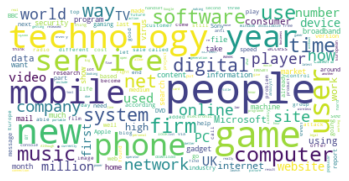

In [7]:
temp_tech=df.loc[df['category'] == 'tech']

#Create stopwords
stopwords=set(STOPWORDS)
stopwords.update(["wa","said","say","n't","Mr","will","ha","told","back","make","us","many","may","set","one","two"])
text=temp_tech.content.str.cat(sep=' ')

lemmatizer = WordNetLemmatizer()
word_list = nltk.word_tokenize(text)
# Lemmatize list of words and join
text = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    
wordcloud=WordCloud(max_font_size=50, max_words=200,stopwords=stopwords,collocations=False,background_color="white").generate(text)

#This is how u show a wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## 2. Classification 

**Metrics Section**: When we use this section, we are gonna calculate classifier's performance with 10-fold Cross Validation to our train set and present metrics such as:accuracy score, precision score, recall_score and F_measure score. All the above are done by our get_CrossValidScores function which calls the apropriate functions. Also, we use Roc_plot function(our function), which calculates and prints a plot with the mean values, for all folds, for each class seperately and the mean macro average of all classes

These functions are gonna help us with the queries

In [3]:
def remove_string_special_characters(s): #function to remove special characters
    
    stripped=s.translate ({ord(c): " " for c in '!@#$%^&*()[]{};:,./<>?\|`~-=_+–…”❤️★⭐♥’’•"'})
    
    # Change any white space to one space 
    stripped = re.sub('\s+', ' ', stripped) 
    
    # Remove start and end white spaces 
    stripped = stripped.strip() 
    if stripped != '': 
            return stripped.lower()
        

def get_CrossValidScores(xTrain,yTrain,model): #function which calls sklearn's cross_validate
    scoring = {'acc': 'accuracy',              # to measure metrics
               'prec_macro': 'precision_macro',
               'rec_macro': 'recall_macro',
               'fmes_macro': 'f1_macro'
              }
    scores = cross_validate(model, xTrain, yTrain, scoring=scoring,
                             cv=10)

    acc_score=scores['test_acc']
    prec_score=scores['test_prec_macro']
    rec_score=scores['test_rec_macro']
    fmes_score=scores['test_fmes_macro']

    return(acc_score,prec_score,rec_score,fmes_score)

def Roc_plot(X,y,model,n_splits=10):      # This function plots the roc_plot
    classes=y.unique().tolist()
    y = label_binarize(y, classes=classes)
    cv =KFold(n_splits=n_splits)
    classifier = OneVsRestClassifier(model)
    tprs = []
    aucs = []
    fprs = []
    n_classes = len(classes)
    mean_fpr = np.linspace(0, 1, 100)
    class_stats = dict()

    for i in range(n_classes):
        class_stats[i]=[[],[]]


    for  train, test in cv.split(X, y):  #for every split
        prediction = classifier.fit(X[train],y[train]).predict_proba(X[test])# we use predict_proba to predict propability
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):  # for every class in every split
            fpr[i], tpr[i], _ = roc_curve(y[test][:, i], prediction[:, i]) # we calcculate fpr and tpr
            roc_auc[i] = auc(fpr[i], tpr[i])    # we also calculate roc_auc
            class_stats[i][0].append(interp(mean_fpr, fpr[i], tpr[i]))  #we save in an array the fpr and tpr and the roc auc
            class_stats[i][1].append(roc_auc[i])                        # for each class for very split so after we can find 
                                                                        #each class mean
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) #after we find mean of all means 
        # Then interpolate all ROC curves at these points                        so at the end we can plot it
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
        aucs.append(roc_auc["macro"])
        tprs.append(interp(mean_fpr, fpr["macro"], tpr["macro"]))

    mean_tpr = np.mean(tprs, axis = 0)
    mean_auc = np.mean(aucs)

    plt.figure(figsize=(11,11))
    plt.plot(mean_fpr, mean_tpr, label='ROC curve of macro avg (area = %0.2f)' % mean_auc)
    plt.plot([0, 1], [0, 1], 'k--')

    for i in range(n_classes):                                    #here we find mean of each class
        mean_tpr = np.mean(class_stats[i][0], axis = 0)
        mean_auc = np.mean(class_stats[i][1])
        plt.plot(mean_fpr, mean_tpr, label='ROC curve of class %s (area = %0.2f)' % (classes[i],mean_auc))

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
        

Here we are gonna split the data to Train(80%) and Test(20%) with train_test_split function and export our tsvs(train_set.tsv, test_set.tsv)

In [4]:
x=df[['id','title','content']]
y=df['category']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2,stratify=y)

train_set=pd.merge(xTrain, yTrain, left_index=True, right_index=True).reset_index(drop=True)
test_set=xTest.copy().reset_index(drop=True)

train_set.to_csv('train_set.tsv', sep = '\t')
test_set.to_csv('test_set.tsv', sep = '\t')

We set the basic stopwords from our libraries

In [6]:
stop_list = set(stwords.words('english')) 
stop_list.update(set(STOPWORDS))                        #wordcloud stopwords

Firstly, we use Bag Of Words method to make the Bow-Array. Bow_train contains the part of words with which we are gonna train our classifiers and bow_test contains the part of words with which we are gonna test them

In [7]:
#make bow vectorizer
bow_vectorizer = CountVectorizer(max_df=1.0, min_df=1, ngram_range=(1,2), max_features=1000,
stop_words=stop_list)

#make train BoW
temp = train_set.copy()
train=[]
for x in temp['content'].tolist():
    train.append(remove_string_special_characters(x))

bow_train = bow_vectorizer.fit_transform(train)

#make test BoW
temp = test_set.copy()
test=[]
for x in temp['content'].tolist():
    test.append(remove_string_special_characters(x))
    
bow_test = bow_vectorizer.transform(test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['let'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Secondly, we use TF-IDF vectorizer to make our TF-IDF array, and then we split tfidf_train and tfidf_test similarly to bow_train and bow_test

In [12]:
#make tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, ngram_range=(1,2), max_features=1000,
stop_words=stop_list)

#make train BoW
temp = train_set.copy()
train=[]
for x in temp['content'].tolist():
    train.append(remove_string_special_characters(x))

tfidf_train = tfidf_vectorizer.fit_transform(train)

#make test tfidf
temp = test_set.copy()
test=[]
for x in temp['content'].tolist():
    test.append(remove_string_special_characters(x))
    
tfidf_test = tfidf_vectorizer.transform(test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['let'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


2_1.  Support Vector Machines (SVM)

Now we are gonna take the bow_train and the SVM classifier to train our data. We use GridSearch for tuning the hyperparameters

In [13]:
#Support Vector Machines with bow
clf = svm.SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3,cv=StratifiedKFold(n_splits=5),n_jobs=1)
grid.fit(bow_train.toarray(), train_set['category'].array)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.955, total=   2.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.941, total=   2.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.941, total=   2.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.952, total=   2.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.961, total=   2.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.955, total=   2.1s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.941, total=   2.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.941, total=   2.1s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.952, total=   2.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .

[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.955, total=   2.1s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.941, total=   2.1s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.941, total=   2.1s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.952, total=   2.1s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.961, total=   2.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.955, total=   2.1s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.941, total=   2.1s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .

[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.952, total=   2.0s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.961, total=   2.1s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.955, total=   2.0s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.941, total=   2.0s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.941, total=   2.0s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.952, total=   2.0s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.961, total=   2.1s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  4.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

After training our data now we gonna see how much accurate is our classifier by predicting test's categories and check them with the real ones. 

In [14]:
y_pred=grid.predict(bow_test.toarray())
print(metrics.accuracy_score(yTest.array, y_pred))

0.9640449438202248


Metrics Section

In [15]:
#Metrics for bow_array svm.SVC
acc_score,prec_score,rec_score,fmes_score=get_CrossValidScores(bow_train.toarray(),train_set['category'].array,svm.SVC())
#Print results
print("Acc_score is %2.15f " %acc_score.mean())
print("prec_score is %2.15f" %prec_score.mean())
print("rec_score is %2.15f" %rec_score.mean())
print("fmes_score is %2.15f" %fmes_score.mean())

Acc_score is 0.951123595505618 
prec_score is 0.951239155718489
rec_score is 0.949458323691396
fmes_score is 0.949911158295769


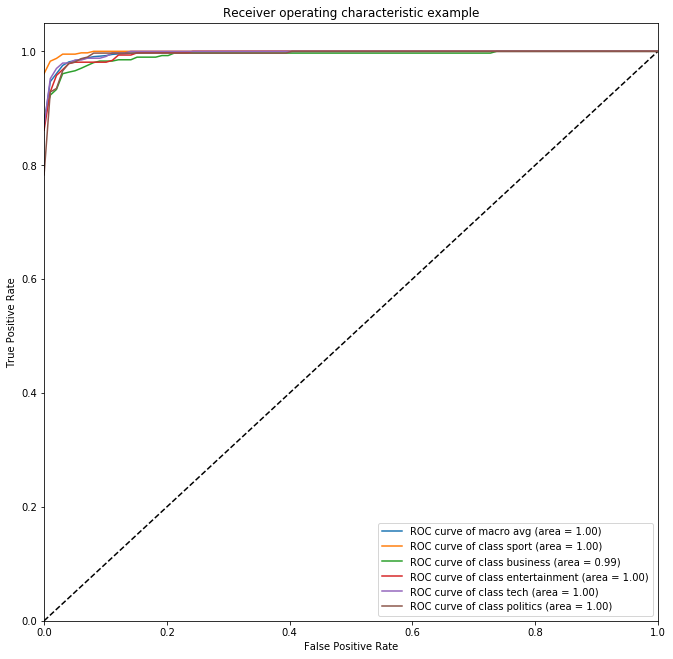

In [16]:
Roc_plot(bow_train.toarray(),train_set['category'],svm.SVC(probability=True))

Now we are gonna take the tfidf_train and the SVM classifier to train our data in the same way

In [17]:
#Support Vector Machines with tfidf
clf = svm.SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3,cv=StratifiedKFold(n_splits=5),n_jobs=1)
grid.fit(tfidf_train.toarray(), train_set['category'].array)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.963, total=   4.9s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.963, total=   4.8s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.6s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.952, total=   4.9s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.966, total=   5.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.935, total=   4.9s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.963, total=   4.8s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.963, total=   4.8s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.952, total=   5.1s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.966, total=   5.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .

[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.978, total=   2.5s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.961, total=   2.5s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.963, total=   2.5s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.966, total=   2.5s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.963, total=   2.6s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.978, total=   2.6s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.961, total=   2.5s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .

[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.966, total=   2.5s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.963, total=   2.5s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.978, total=   2.4s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.961, total=   2.5s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.963, total=   2.6s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.966, total=   2.5s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.963, total=   2.4s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  6.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

After training our data now we gonna see how much accurate is our classifier by predicting test's categories and check them with the real ones. 

In [18]:
y_pred=grid.predict(tfidf_test.toarray())
print(metrics.accuracy_score(yTest.array, y_pred))

0.9685393258426966


Metrics Section

In [19]:
#Metrics for tfidf_array svm.SVC
acc_score,prec_score,rec_score,fmes_score=get_CrossValidScores(tfidf_train.toarray(),train_set['category'].array,svm.SVC())
#Print results
print("Acc_score is %2.15f " %acc_score.mean())
print("prec_score is %2.15f" %prec_score.mean())
print("rec_score is %2.15f" %rec_score.mean())
print("fmes_score is %2.15f" %fmes_score.mean())

Acc_score is 0.969101123595506 
prec_score is 0.970228329519890
rec_score is 0.969066473266941
fmes_score is 0.969187986832989


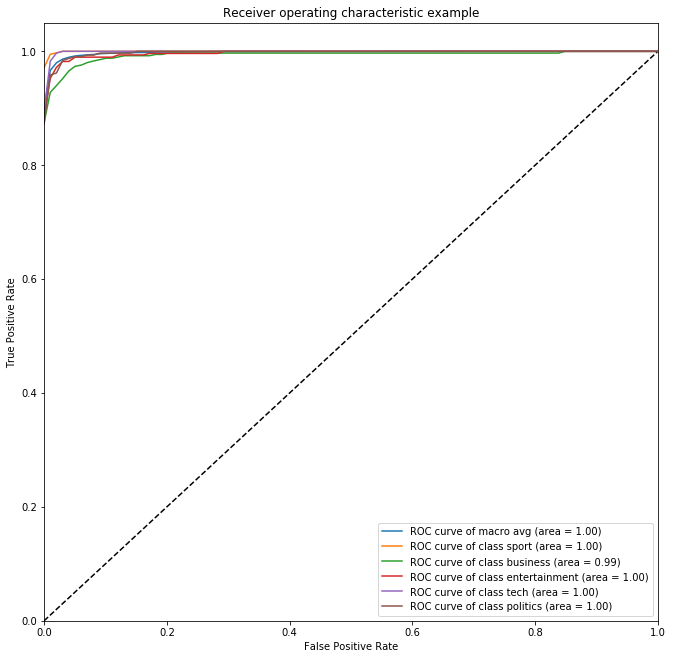

In [20]:
Roc_plot(tfidf_train.toarray(),train_set['category'],svm.SVC(probability=True))

2_2. Random Forests

Now we are gonna take the bow_train and the RandomForestClassifier to train our data. We use GridSearch for tuning the hyperparameters

In [21]:
#Random Forest
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 8, 10],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


#rf = RandomForestClassifier(max_depth=5, random_state=0)
grid_search.fit(bow_train.toarray(), train_set['category'].array);

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:  1.6min finished


After training our data now we gonna see how much accurate is our classifier by predicting test's categories and check them with the real ones.

In [22]:
y_pred=grid_search.predict(bow_test.toarray())
print(metrics.accuracy_score(yTest.array, y_pred))

0.9146067415730337


Metrics Section

In [23]:
acc_score,prec_score,rec_score,fmes_score=get_CrossValidScores(bow_train.toarray(),train_set['category'].array,RandomForestClassifier(max_depth=5, random_state=0))
#Print results
print("Acc_score is %2.15f " %acc_score.mean())
print("prec_score is %2.15f" %prec_score.mean())
print("rec_score is %2.15f" %rec_score.mean())
print("fmes_score is %2.15f" %fmes_score.mean())

Acc_score is 0.888764044943820 
prec_score is 0.908759505811038
rec_score is 0.880140411146219
fmes_score is 0.886594673600169


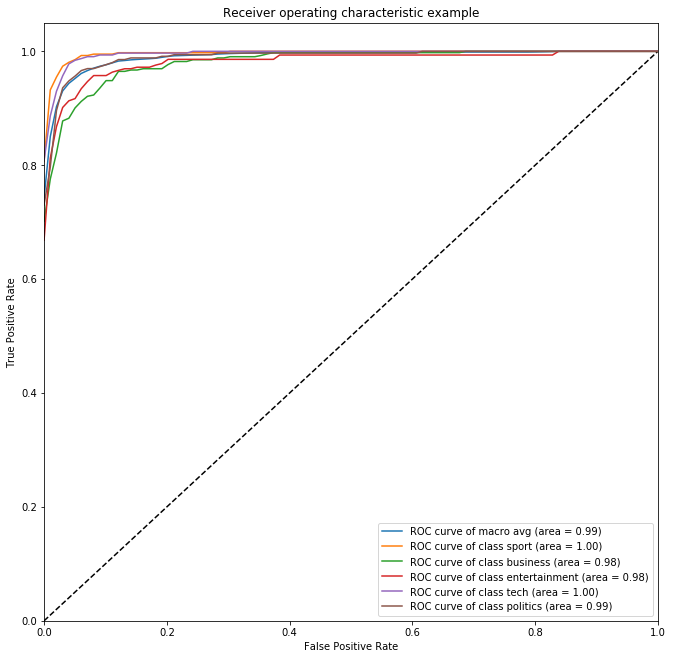

In [24]:
Roc_plot(bow_train.toarray(),train_set['category'],RandomForestClassifier(max_depth=5,random_state=0))

Now we are gonna take the tfidf_train and the RandomForestClassifier to train our data in the same way

In [25]:
#Random Forest
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 8, 10],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


#rf = RandomForestClassifier(max_depth=5, random_state=0)
grid_search.fit(tfidf_train.toarray(), train_set['category'].array);

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:  1.6min finished


After training our data now we gonna see how much accurate is our classifier by predicting test's categories and check them with the real ones.

In [26]:
y_pred=grid_search.predict(tfidf_test.toarray())
print(metrics.accuracy_score(yTest.array, y_pred))

0.903370786516854


Metrics Section

In [27]:
acc_score,prec_score,rec_score,fmes_score=get_CrossValidScores(tfidf_train.toarray(),train_set['category'].array,RandomForestClassifier(max_depth=5, random_state=0))
#Print results
print("Acc_score is %2.15f " %acc_score.mean())
print("prec_score is %2.15f" %prec_score.mean())
print("rec_score is %2.15f" %rec_score.mean())
print("fmes_score is %2.15f" %fmes_score.mean())

Acc_score is 0.896067415730337 
prec_score is 0.914245742665154
rec_score is 0.888527699707306
fmes_score is 0.894765316489462


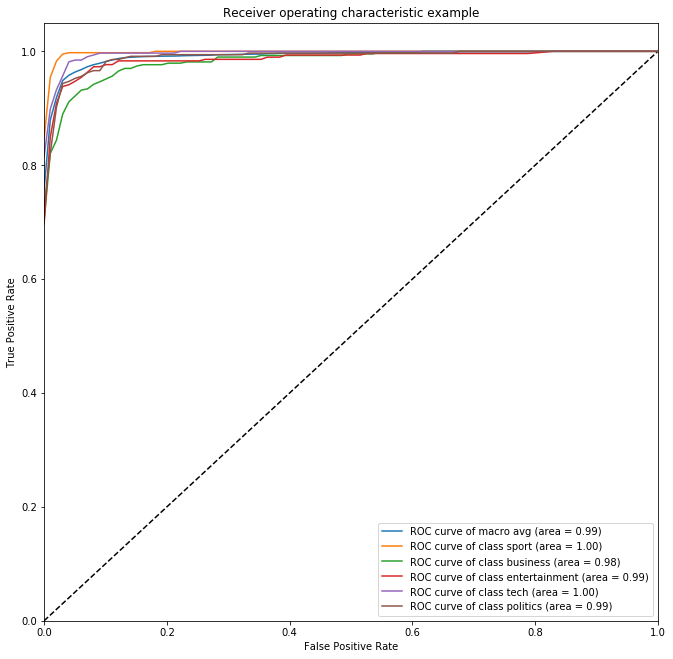

In [28]:
Roc_plot(tfidf_train.toarray(),train_set['category'],RandomForestClassifier(max_depth=5, random_state=0))

2_3. Naive Bayes

Now we are gonna take the bow_train and the GaussianNB classifier to train our data

In [12]:
yTest

1499            sport
1047         politics
12           business
736     entertainment
457          business
            ...      
450          business
478          business
1357            sport
570     entertainment
1590            sport
Name: category, Length: 445, dtype: object

In [8]:
# Naive Bayes bow
gnb = GaussianNB()
gnb.fit(bow_train.toarray(), train_set['category'].array);

After training our data now we gonna see how much accurate is our classifier by predicting test's categories and check them with the real ones.

In [30]:
y_pred=gnb.predict(bow_test.toarray())
print(metrics.accuracy_score(yTest.array, y_pred))

0.9235955056179775


Metrics Section

In [31]:
acc_score,prec_score,rec_score,fmes_score=get_CrossValidScores(bow_train.toarray(),train_set['category'].array,GaussianNB())
#Print results
print("Acc_score is %2.15f " %acc_score.mean())
print("prec_score is %2.15f" %prec_score.mean())
print("rec_score is %2.15f" %rec_score.mean())
print("fmes_score is %2.15f" %fmes_score.mean())

Acc_score is 0.915730337078652 
prec_score is 0.917803826722672
rec_score is 0.916549045904035
fmes_score is 0.914945090764838


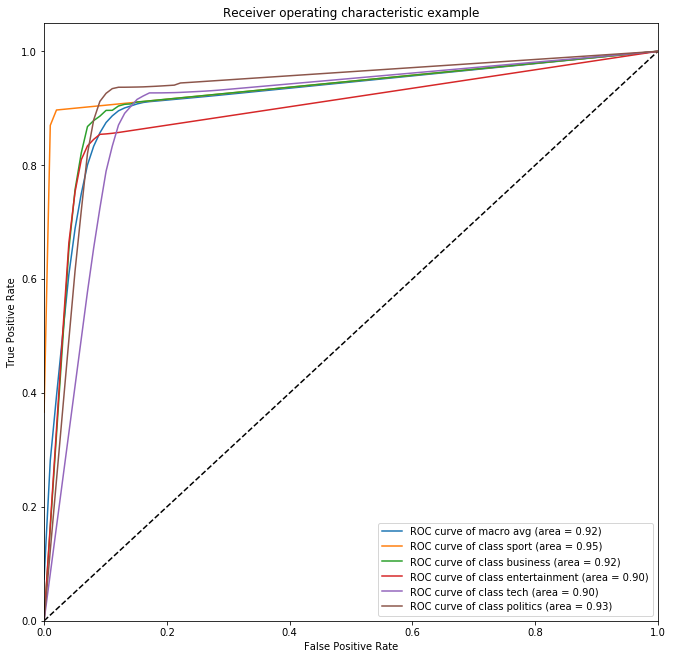

In [32]:
Roc_plot(bow_train.toarray(),train_set['category'],GaussianNB())

Now we are gonna take the tfidf_train and the GaussianNB classifier to train our data

In [33]:
# Naive Bayes tfidf
gnb = GaussianNB()
gnb.fit(tfidf_train.toarray(), train_set['category'].array);

After training our data now we gonna see how much accurate is our classifier by predicting test's categories and check them with the real ones.

In [34]:
y_pred=gnb.predict(tfidf_test.toarray())
print(metrics.accuracy_score(yTest.array, y_pred))

0.9235955056179775


Metrics Section

In [35]:
acc_score,prec_score,rec_score,fmes_score=get_CrossValidScores(tfidf_train.toarray(),train_set['category'].array,GaussianNB())
#Print results
print("Acc_score is %2.15f " %acc_score.mean())
print("prec_score is %2.15f" %prec_score.mean())
print("rec_score is %2.15f" %rec_score.mean())
print("fmes_score is %2.15f" %fmes_score.mean())

Acc_score is 0.906179775280899 
prec_score is 0.907330045747438
rec_score is 0.907474257430603
fmes_score is 0.905083916813007


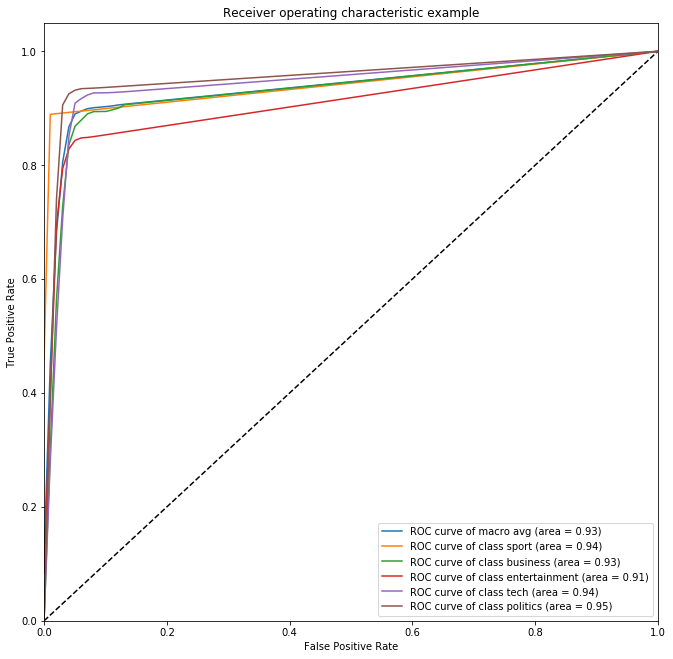

In [36]:
Roc_plot(tfidf_train.toarray(),train_set['category'],GaussianNB())

2_4.  K-Nearest Neighbor (OUR IMPLEMENTATION)

In [37]:
from sklearn.base import BaseEstimator,ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels

def k_largest_index_argsort(a, k):
    idx = np.argsort(a.ravel())[:-k-1:-1]
    return np.column_stack(np.unravel_index(idx, a.shape))


class KNN(BaseEstimator, ClassifierMixin): # Our Knn class
    
    def __init__(self, n_neighbors=5): # initialise Knn with default parameters for n_neighbors
        self.n_neighbors=n_neighbors
        
    def fit(self,X,y=None):
        X, y = check_X_y(X, y)  # check for the sizes
        self.classes_ = unique_labels(y)
        self.X_train = X
        self.y_train = y
    
    def predict(self,X):
        check_is_fitted(self) # check if it is fitted
        X = check_array(X)   
        pred = []
        for test_row in X:
            cat = []
            indexes = self.GetkNeighborsIndexes(test_row) # take the indexes
            for index in indexes:
                    cat.append(self.y_train[index])  # we append the real class of neighbours
            y = self.MajorityVoting(cat) 
            if y != -1:  
                pred.append(y)
            else:
                print('Category is missing')
                return -1
        return pred

    def predict_proba(self,X):   # our function for predicting probabilities for KNN 
        check_is_fitted(self)
        X = check_array(X)   
        pred = []
        for test_row in X:
            cat = []
            indexes = self.GetkNeighborsIndexes(test_row)
            for index in indexes:
                    cat.append(self.y_train[index])
            y = []
            for x in sorted(self.classes_):  # lexicographic sort of class names
                y.append(cat.count(x)/len(self.classes_))#we devide the frequency of the word in list with the number of classes
            pred.append(y)
        return np.array(pred)
    
    def MajorityVoting(self,List): # find the class by majority voting
        if List == []: # if empty 
            return -1
        counter = 0
        for x in List: 
                curr_frequency = List.count(x)  # count the frequency of items in list
                if(curr_frequency > counter):   # take the bigger one
                    counter = curr_frequency 
                    curr = x 
        return curr
      
    def GetkNeighborsIndexes(self, test_row): # locate the most similar neighbors
        neighbors = []
        a = cosine_similarity(self.X_train,test_row.reshape(1,-1)) #cosine similarity as metric
        for x in k_largest_index_argsort(a, self.n_neighbors).tolist():
            neighbors.append(x[0])
        return neighbors
    

First, we initialise and train ours KNN implementation with the bow_train. Secondly, after training our data we see how much accurate is our classifier by predicting test's categories and check them with the real ones.

In [38]:
knn=KNN(n_neighbors=5)

knn.fit(bow_train.toarray(),train_set['category'].array)
y_pred=knn.predict(bow_test.toarray())
print(metrics.accuracy_score(yTest.array, y_pred))

0.9258426966292135


Metrics Section

In [39]:
acc_score,prec_score,rec_score,fmes_score=get_CrossValidScores(bow_train.toarray(),train_set['category'].array,KNN(n_neighbors=5))
#Print results
print("Acc_score is %2.15f " %acc_score.mean())
print("prec_score is %2.15f" %prec_score.mean())
print("rec_score is %2.15f" %rec_score.mean())
print("fmes_score is %2.15f" %fmes_score.mean())

Acc_score is 0.918539325842697 
prec_score is 0.922216278205050
rec_score is 0.917764577907552
fmes_score is 0.917273086566781


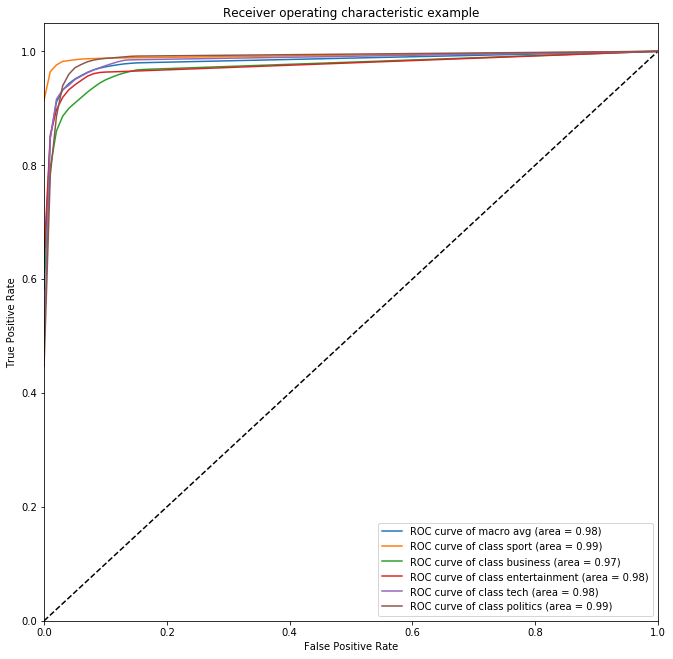

In [40]:
Roc_plot(bow_train.toarray(),train_set['category'],KNN(n_neighbors=5))

First, we initialise and train ours KNN implementation with the tfidf_train. Secondly, after training our data we see how much accurate is our classifier by predicting test's categories and check them with the right ones.

In [41]:
knn=KNN(n_neighbors=5)

knn.fit(tfidf_train.toarray(),train_set['category'].array)
y_pred=knn.predict(tfidf_test.toarray())
print(metrics.accuracy_score(yTest.array, y_pred))

0.9280898876404494


Metrics Section

In [42]:
acc_score,prec_score,rec_score,fmes_score=get_CrossValidScores(tfidf_train.toarray(),train_set['category'].array,KNN(n_neighbors=5))
#Print results
print("Acc_score is %2.15f " %acc_score.mean())
print("prec_score is %2.15f" %prec_score.mean())
print("rec_score is %2.15f" %rec_score.mean())
print("fmes_score is %2.15f" %fmes_score.mean())

Acc_score is 0.928089887640449 
prec_score is 0.931014128201153
rec_score is 0.926934278979455
fmes_score is 0.927159756167054


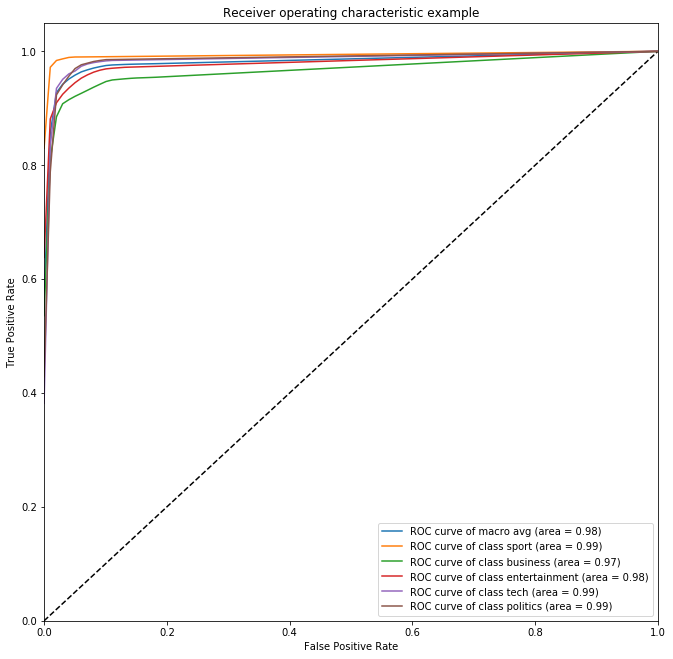

In [43]:
Roc_plot(tfidf_train.toarray(),train_set['category'],KNN(n_neighbors=5))

# 3. Beat the Benchmark (bonus)

Here we are going to import the extra libraries that we will use for this query

In [44]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler
from gensim import utils
import gensim.parsing.preprocessing as gsp

unable to import 'smart_open.gcs', disabling that module


Here is the function that we will use to this query for some extra cleaning of the data. This function delete numbers, some extra stopwords, small words and does text stemming.

In [45]:
filters = [
           gsp.strip_numeric,
           gsp.remove_stopwords, 
           gsp.strip_short, 
           gsp.stem_text
          ]

def clean_text(s):
    s = s.lower()
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
    return s

Here we have the results of KNN method before the methods that we will use

Bow_train results:

In [46]:
knn=KNN(n_neighbors=5)

knn.fit(bow_train.toarray(),train_set['category'].array)
y_pred=knn.predict(bow_test.toarray())
print(metrics.accuracy_score(yTest.array, y_pred))

0.9258426966292135


Tfidf_train results:

In [47]:
knn=KNN(n_neighbors=5)

knn.fit(tfidf_train.toarray(),train_set['category'].array)
y_pred=knn.predict(tfidf_test.toarray())
print(metrics.accuracy_score(yTest.array, y_pred))

0.9280898876404494


So,firstly we are gonna make the new BOW-array after the extra cleaning of our data

In [48]:
temp = train_set.copy()
train=[]
for x in temp['content'].tolist():
    train.append(clean_text(x))
    
bow_train = bow_vectorizer.fit_transform(train)

#make test bow
temp = test_set.copy()
test=[]
for x in temp['content'].tolist():
    test.append(clean_text(x))
    
bow_test = bow_vectorizer.transform(test)

Here we are gonna make the new TFIDF-array after the extra cleaning of our data

In [49]:
temp = train_set.copy()
train=[]
for x in temp['content'].tolist():
    train.append(clean_text(x))
    
tfidf_train = tfidf_vectorizer.fit_transform(train)

#make test tfidf
temp = test_set.copy()
test=[]
for x in temp['content'].tolist():
    test.append(clean_text(x))
    
tfidf_test = tfidf_vectorizer.transform(test)

Secondly for the bow_array we use RobustScaler for better results

In [50]:
x1train=RobustScaler(quantile_range=(45.0, 65.0)).fit_transform(bow_train.toarray())
x1test=RobustScaler(quantile_range=(45.0, 65.0)).fit_transform(bow_test.toarray())

clf=KNN(n_neighbors=5)
clf.fit(x1train,train_set['category'].array)
y_pred=clf.predict(x1test)
print(metrics.accuracy_score(yTest.array, y_pred))

0.9348314606741573


For the tfidf_array we use MinMaxScaler for better results

In [51]:
x1train=MinMaxScaler(feature_range=(0, 1)).fit_transform(tfidf_train.toarray())
x1test=MinMaxScaler(feature_range=(0, 1)).fit_transform(tfidf_test.toarray())

clf=KNN(n_neighbors=5)
clf.fit(x1train,train_set['category'].array)
y_pred=clf.predict(x1test)
print(metrics.accuracy_score(yTest.array, y_pred))

0.9595505617977528


# 4. Clustering

Here we are going to import the extra libraries that we will use for this query

In [52]:
import gensim
from sklearn.cluster import KMeans
from sklearn import preprocessing  # to normalise existing X
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import FastICA

For this task we downloaded and used Google's free pre-trained embedding. 

In [53]:
model = gensim.models.KeyedVectors.load_word2vec_format('C:\Tede\Ergasia2\GoogleNews-vectors-negative3001.bin', binary=True)  

Here is the only extra function that we use, which makes the document embeddings array 

In [54]:
def create_doc_embeddings(docs,model):
    tokenized_docs = []
    for row in docs:
        tokens = remove_string_special_characters(row).split() # we remove special characters and tokenize the documents
        temp = [x for x in tokens if x not in stop_list]       #remove stopwords      
        tokenized_docs.append(temp)
    doc_vectors = []
    for doc in tokenized_docs:
        flag = 0
        l = []
        for w in doc:
            if w in model:
                l.append(model[w])
                flag = 1
            else: # if not in model we make an array with a random value 
                l.append(np.full(model.vector_size,random.uniform(-1, 1))) 
        if flag == 0: #if list is empty we make an array with zeros
            arr = np.zeros(model.vector_size)
            doc_vectors = arr
        else:     # else we find the mean of words in the document
            arr = np.array(l)
            mean = np.mean(arr, axis=0)
            doc_vectors.append(mean) 
    return np.array(doc_vectors)

YnewTrain is used to visualise our real categories 

In [55]:
ynewTrain=yTrain
ynewTrain=ynewTrain.replace('entertainment',1)
ynewTrain=ynewTrain.replace('business',0)
ynewTrain=ynewTrain.replace('politics',2)
ynewTrain=ynewTrain.replace('sport',3)
ynewTrain=ynewTrain.replace('tech',4)
number_of_clusters=5

We run our clustering method after normalizing our data(transformation so we can use **cosine similarity**) and appear 2 plots. The first one has the results of the clusterring and the second one has the real categories. To make the plots we use PCA method(we have also appear plots with the other 2 methods in the bonus part)

4_1. We use the above method for the Bow-array

                                                   text  category
0     second seed andr agassi suffer comprehens defe...         2
1     anglo-dutch consum good giant unilev merg mana...         1
2     hip-hop duo outkast cap year award glori prize...         4
3     arriv new titl popular medal honor duti franch...         2
4     tori leader michael howard dismiss claim immig...         3
...                                                 ...       ...
1775  faster, better funkier hardwar go help phone f...         0
1776  roger feder reach qatar open easi win seventh ...         2
1777  measure, new yorker dick morri thing american ...         3
1778  spectat evacu real madrid' bernabeu stadium su...         2
1779  german firm main product deriv saliva vampir b...         1

[1780 rows x 2 columns]


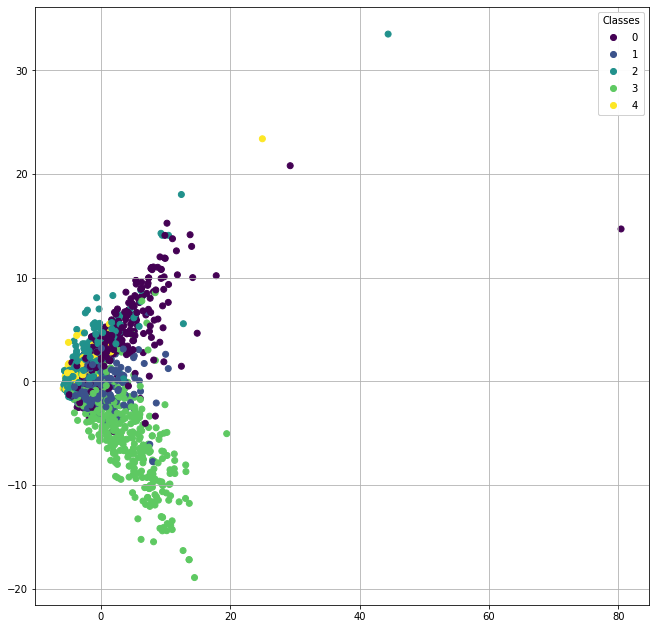

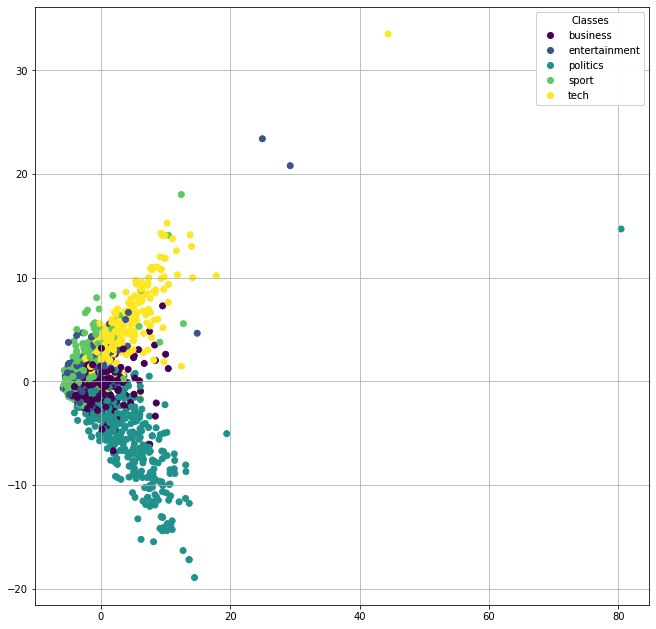

In [56]:
km = KMeans(n_clusters=number_of_clusters)
X_Norm_bow = preprocessing.normalize(bow_train)
km.fit(X_Norm_bow)
results_bow = pd.DataFrame({
    'text': train,
    'category': km.labels_
})
print(results_bow)

x = StandardScaler().fit_transform(bow_train.toarray()) #we use standard scaler to optimize the results
data2D = PCA(n_components=2).fit_transform(x)

fig, ax = plt.subplots(figsize=(11, 11))
x=data2D[:,0]
y=data2D[:,1]
scatter = ax.scatter(x, y ,c=results_bow['category'])
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Classes")
ax.add_artist(legend1)
ax.grid(True)

plt.show()

fig, ax = plt.subplots(figsize=(11, 11))
x=data2D[:,0]
y=data2D[:,1]
scatter = ax.scatter(x, y ,c=ynewTrain)
handles, labels = scatter.legend_elements()
labels=["business","entertainment","politics","sport","tech"]
legend1 = ax.legend(handles,labels,
                    loc="best", title="Classes")
ax.add_artist(legend1)
ax.grid(True)
plt.show()


4_2. We use the above method for the Tf-idf-array

                                                   text  category
0     second seed andr agassi suffer comprehens defe...         3
1     anglo-dutch consum good giant unilev merg mana...         4
2     hip-hop duo outkast cap year award glori prize...         1
3     arriv new titl popular medal honor duti franch...         3
4     tori leader michael howard dismiss claim immig...         2
...                                                 ...       ...
1775  faster, better funkier hardwar go help phone f...         0
1776  roger feder reach qatar open easi win seventh ...         3
1777  measure, new yorker dick morri thing american ...         2
1778  spectat evacu real madrid' bernabeu stadium su...         3
1779  german firm main product deriv saliva vampir b...         4

[1780 rows x 2 columns]


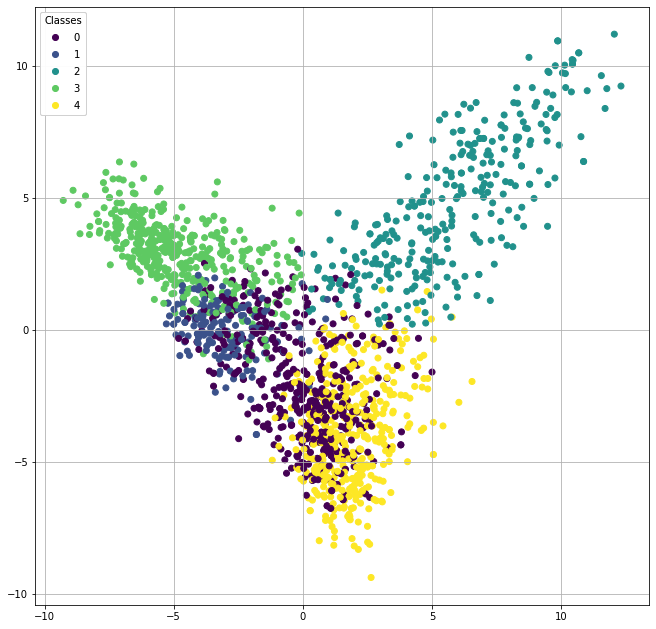

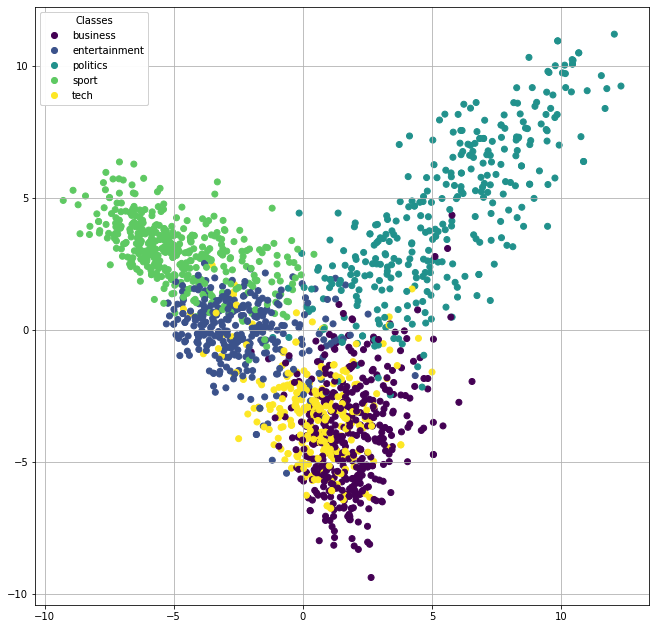

In [57]:
km = KMeans(n_clusters=number_of_clusters)
X_Norm_tfidf = preprocessing.normalize(tfidf_train)
km.fit(X_Norm_tfidf)
results_tfidf = pd.DataFrame({
    'text': train,
    'category': km.labels_
})
print(results_tfidf)

x = StandardScaler().fit_transform(tfidf_train.toarray())#we use standard scaler to optimize the results
data2D = PCA(n_components=2).fit_transform(x)

fig, ax = plt.subplots(figsize=(11, 11))
x=data2D[:,0]
y=data2D[:,1]
scatter = ax.scatter(x, y ,c=results_tfidf['category'])
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Classes")
ax.add_artist(legend1)
ax.grid(True)

plt.show()

fig, ax = plt.subplots(figsize=(11, 11))
x=data2D[:,0]
y=data2D[:,1]
scatter = ax.scatter(x, y ,c=ynewTrain)
handles, labels = scatter.legend_elements()
labels=["business","entertainment","politics","sport","tech"]
legend1 = ax.legend(handles,labels,
                    loc="best", title="Classes")
ax.add_artist(legend1)
ax.grid(True)

plt.show()

4_3. Here we must first create the word2vector-array and then use the above method 

                                                   text  category
0     second seed andr agassi suffer comprehens defe...         3
1     anglo-dutch consum good giant unilev merg mana...         2
2     hip-hop duo outkast cap year award glori prize...         3
3     arriv new titl popular medal honor duti franch...         4
4     tori leader michael howard dismiss claim immig...         1
...                                                 ...       ...
1775  faster, better funkier hardwar go help phone f...         4
1776  roger feder reach qatar open easi win seventh ...         0
1777  measure, new yorker dick morri thing american ...         1
1778  spectat evacu real madrid' bernabeu stadium su...         3
1779  german firm main product deriv saliva vampir b...         3

[1780 rows x 2 columns]


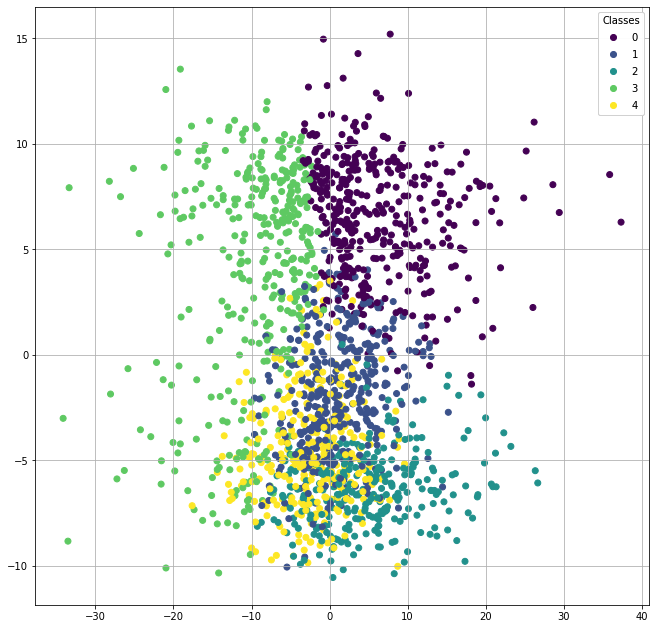

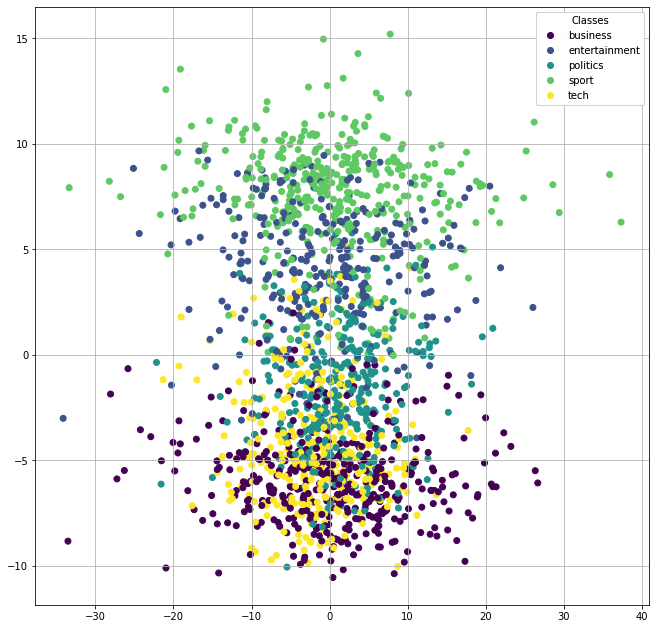

In [58]:
temp = train_set.copy()
w2vec_train=create_doc_embeddings(temp['content'],model)

km = KMeans(n_clusters=number_of_clusters)
X_Norm_w2vec = preprocessing.normalize(w2vec_train)
km.fit(X_Norm_w2vec)
results_w2vec = pd.DataFrame({
    'text': train,
    'category': km.labels_
})
print(results_w2vec)

x = StandardScaler().fit_transform(w2vec_train)  #we use standard scaler to optimize the results
data2D = PCA(n_components=2).fit_transform(x)


fig, ax = plt.subplots(figsize=(11, 11))
x=data2D[:,0]
y=data2D[:,1]
scatter = ax.scatter(x, y ,c=results_w2vec['category'])
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Classes")
ax.add_artist(legend1)
ax.grid(True)

plt.show()

fig, ax = plt.subplots(figsize=(11, 11))
x=data2D[:,0]
y=data2D[:,1]
scatter = ax.scatter(x, y ,c=ynewTrain)
handles, labels = scatter.legend_elements()
labels=["business","entertainment","politics","sport","tech"]
legend1 = ax.legend(handles,labels,
                    loc="best", title="Classes")
ax.add_artist(legend1)
ax.grid(True)
plt.show()

# 4 CLUSTERING BONUS

In the bonus part we make all the above diagrams with the methods of **Singular Value Decomposition (SVD)** and **Independent Component Analysis (ICA)**

SVD in bow_train

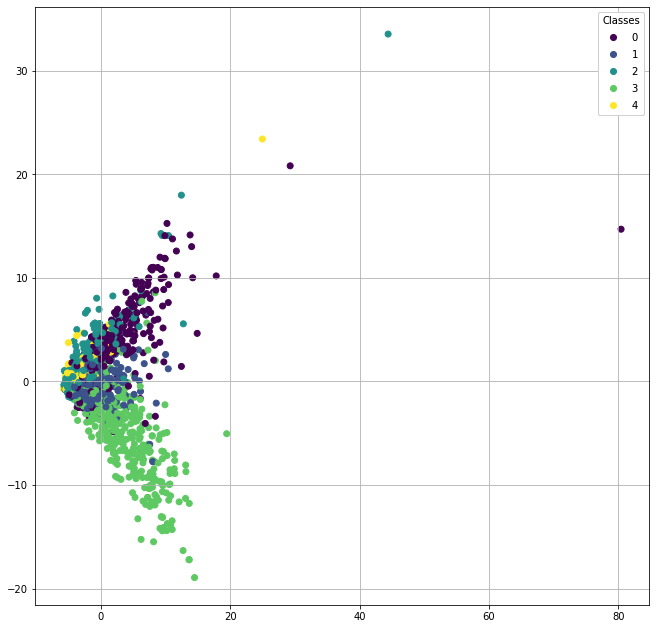

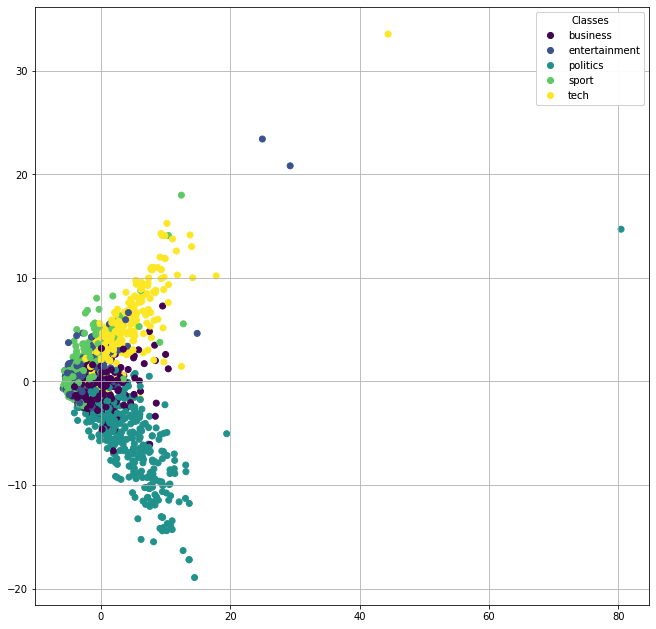

In [59]:
x = StandardScaler().fit_transform(bow_train.toarray())

svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
data2D=svd.fit_transform(x)

fig, ax = plt.subplots(figsize=(11, 11))
x=data2D[:,0]
y=data2D[:,1]
scatter = ax.scatter(x, y ,c=results_bow['category'])
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Classes")
ax.add_artist(legend1)
ax.grid(True)

plt.show()

fig, ax = plt.subplots(figsize=(11, 11))
x=data2D[:,0]
y=data2D[:,1]
scatter = ax.scatter(x, y ,c=ynewTrain)
handles, labels = scatter.legend_elements()
labels=["business","entertainment","politics","sport","tech"]
legend1 = ax.legend(handles,labels,
                    loc="best", title="Classes")
ax.add_artist(legend1)
ax.grid(True)

plt.show()


SVD in tfidf_train

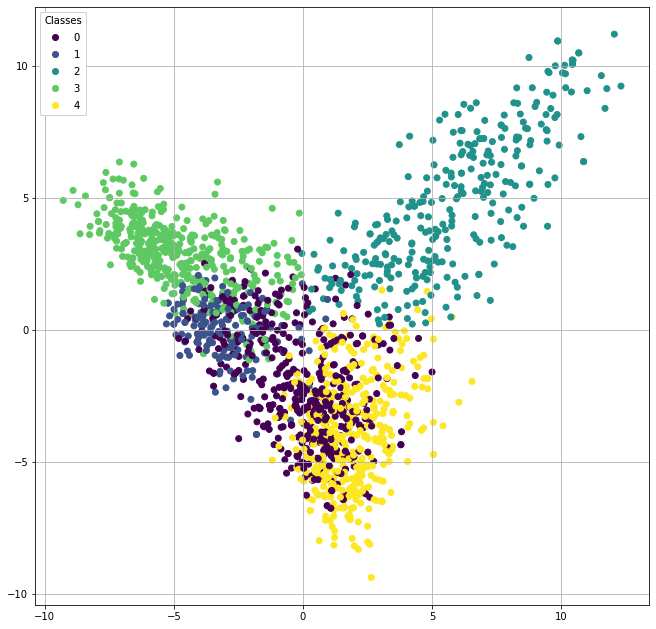

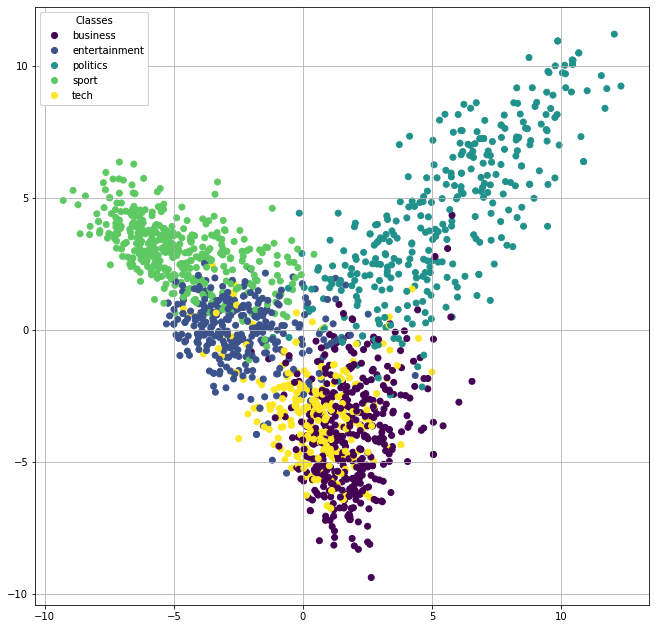

In [60]:
x = StandardScaler().fit_transform(tfidf_train.toarray())

svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
data2D=svd.fit_transform(x)

fig, ax = plt.subplots(figsize=(11, 11))
x=data2D[:,0]
y=data2D[:,1]
scatter = ax.scatter(x, y ,c=results_tfidf['category'])
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Classes")
ax.add_artist(legend1)
ax.grid(True)

plt.show()

fig, ax = plt.subplots(figsize=(11, 11))
x=data2D[:,0]
y=data2D[:,1]
scatter = ax.scatter(x, y ,c=ynewTrain)
handles, labels = scatter.legend_elements()
labels=["business","entertainment","politics","sport","tech"]
legend1 = ax.legend(handles,labels,
                    loc="best", title="Classes")
ax.add_artist(legend1)
ax.grid(True)

plt.show()


SVD in w2vec_train

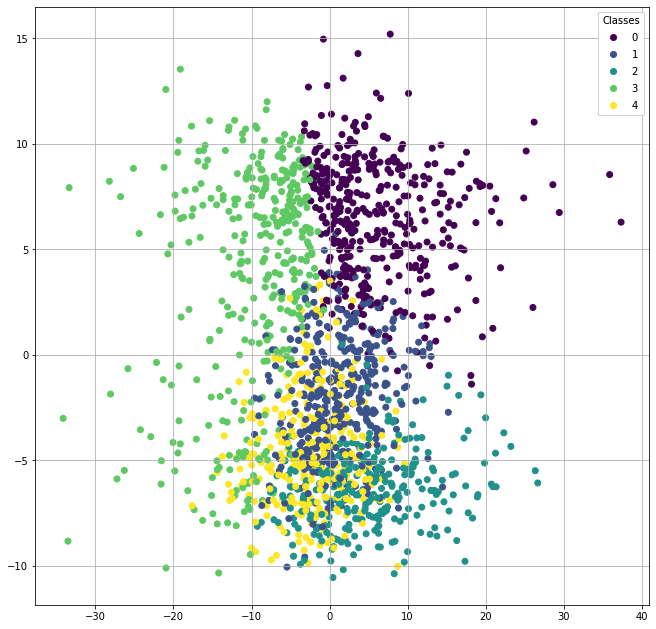

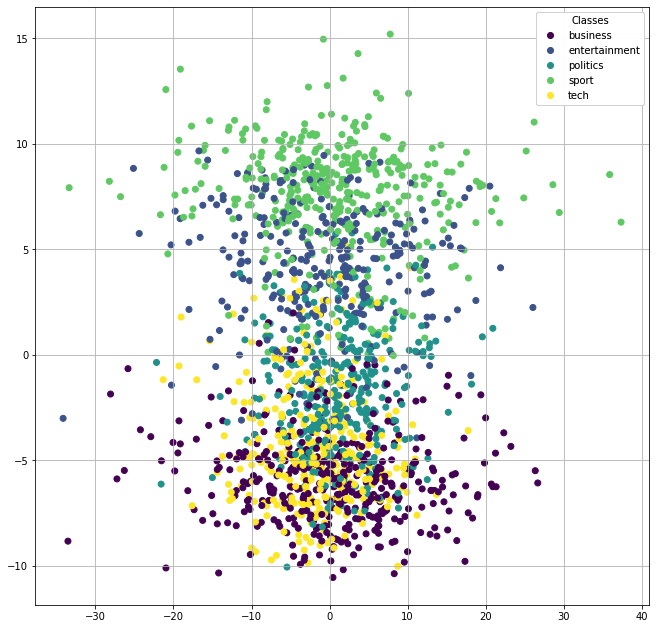

In [61]:
x = StandardScaler().fit_transform(w2vec_train)

svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
data2D=svd.fit_transform(x)

fig, ax = plt.subplots(figsize=(11, 11))
x=data2D[:,0]
y=data2D[:,1]
scatter = ax.scatter(x, y ,c=results_w2vec['category'])
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Classes")
ax.add_artist(legend1)
ax.grid(True)

plt.show()

fig, ax = plt.subplots(figsize=(11, 11))
x=data2D[:,0]
y=data2D[:,1]
scatter = ax.scatter(x, y ,c=ynewTrain)
handles, labels = scatter.legend_elements()
labels=["business","entertainment","politics","sport","tech"]
legend1 = ax.legend(handles,labels,
                    loc="best", title="Classes")
ax.add_artist(legend1)
ax.grid(True)

plt.show()


PCA in bow_train

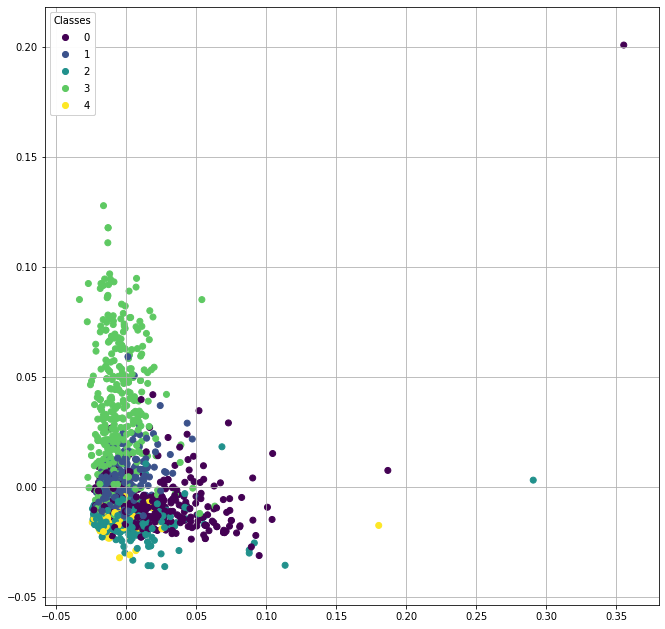

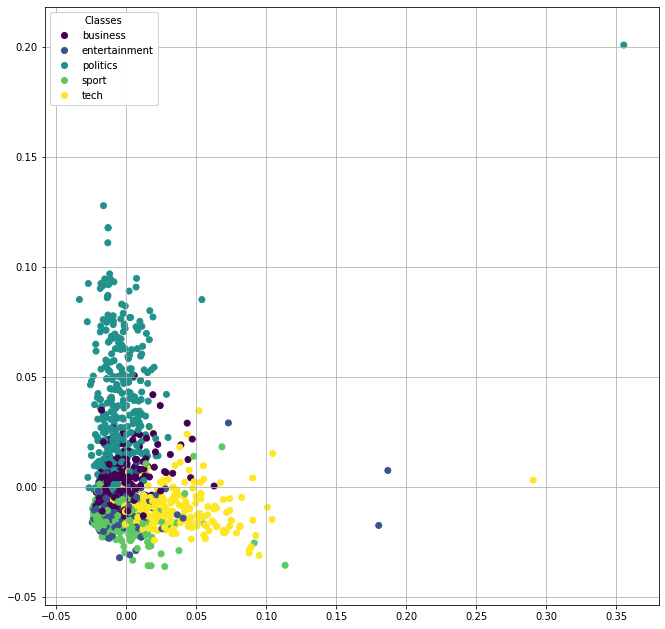

In [62]:
x = StandardScaler().fit_transform(bow_train.toarray())

transformer = FastICA(n_components=2,
random_state=42)
data2D = transformer.fit_transform(x)

fig, ax = plt.subplots(figsize=(11, 11))
x=data2D[:,0]
y=data2D[:,1]
scatter = ax.scatter(x, y ,c=results_bow['category'])
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Classes")
ax.add_artist(legend1)
ax.grid(True)

plt.show()

fig, ax = plt.subplots(figsize=(11, 11))
x=data2D[:,0]
y=data2D[:,1]
scatter = ax.scatter(x, y ,c=ynewTrain)
handles, labels = scatter.legend_elements()
labels=["business","entertainment","politics","sport","tech"]
legend1 = ax.legend(handles,labels,
                    loc="best", title="Classes")
ax.add_artist(legend1)
ax.grid(True)

plt.show()

PCA in tfidf_train

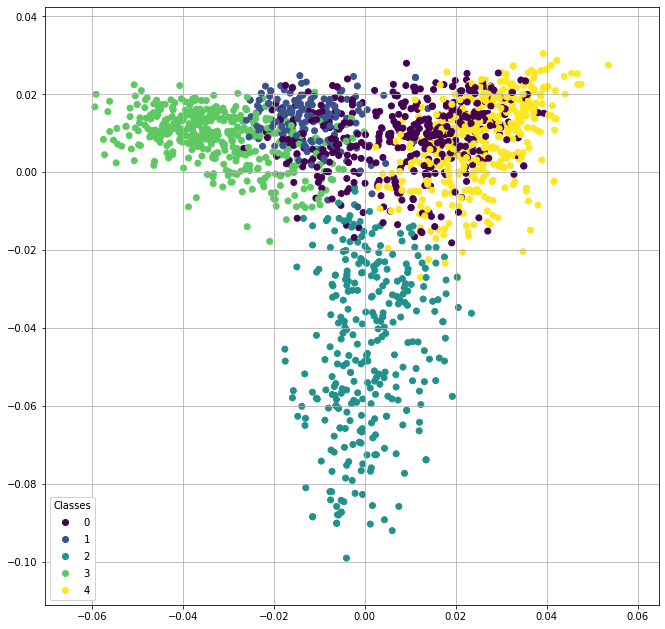

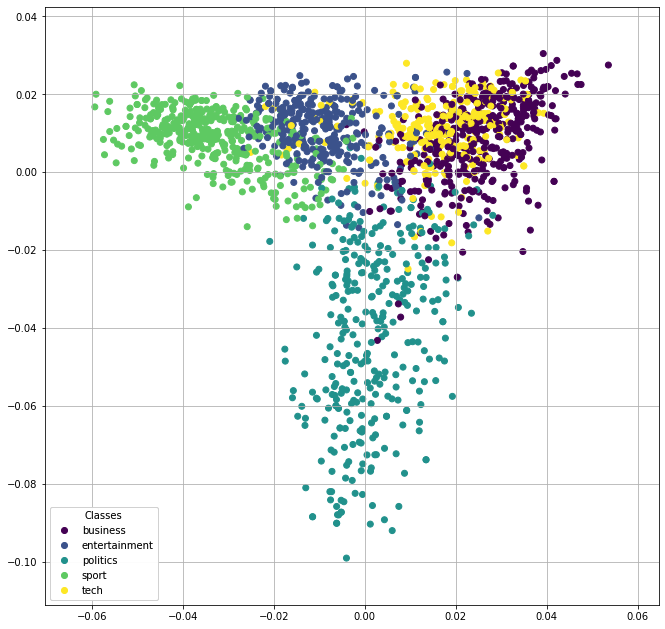

In [63]:
x = StandardScaler().fit_transform(tfidf_train.toarray())

transformer = FastICA(n_components=2,
random_state=42)
data2D = transformer.fit_transform(x)

fig, ax = plt.subplots(figsize=(11, 11))
x=data2D[:,0]
y=data2D[:,1]
scatter = ax.scatter(x, y ,c=results_tfidf['category'])
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Classes")
ax.add_artist(legend1)
ax.grid(True)

plt.show()

fig, ax = plt.subplots(figsize=(11, 11))
x=data2D[:,0]
y=data2D[:,1]
scatter = ax.scatter(x, y ,c=ynewTrain)
handles, labels = scatter.legend_elements()
labels=["business","entertainment","politics","sport","tech"]
legend1 = ax.legend(handles,labels,
                    loc="best", title="Classes")
ax.add_artist(legend1)
ax.grid(True)

plt.show()

PCA in w2vec_train

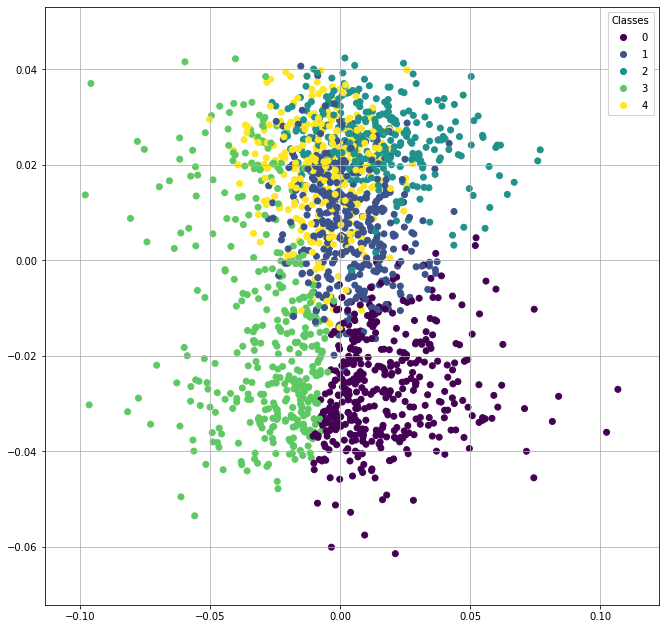

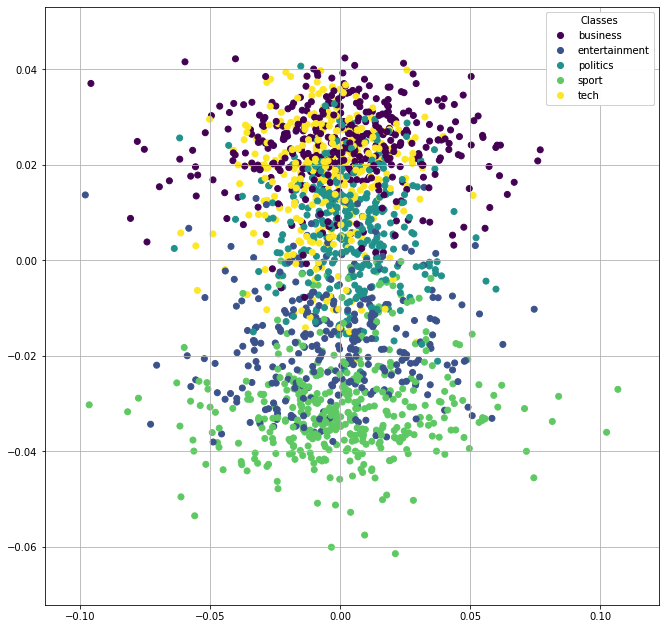

In [64]:
x = StandardScaler().fit_transform(w2vec_train)

transformer = FastICA(n_components=2,
random_state=42)
data2D = transformer.fit_transform(x)

fig, ax = plt.subplots(figsize=(11, 11))
x=data2D[:,0]
y=data2D[:,1]
scatter = ax.scatter(x, y ,c=results_w2vec['category'])
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Classes")
ax.add_artist(legend1)
ax.grid(True)

plt.show()

fig, ax = plt.subplots(figsize=(11, 11))
x=data2D[:,0]
y=data2D[:,1]
scatter = ax.scatter(x, y ,c=ynewTrain)
handles, labels = scatter.legend_elements()
labels=["business","entertainment","politics","sport","tech"]
legend1 = ax.legend(handles,labels,
                    loc="best", title="Classes")
ax.add_artist(legend1)
ax.grid(True)

plt.show()